# Salary dataset Analysis
## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import the data

In [3]:
salary= pd.read_csv("Salary_Dataset_with_Extra_Features.csv")
salary.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
salary.tail()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web
22769,3.8,Thomson Reuters,Associate Web Developer,300000,7,Bangalore,Full Time,Web


## Shape of dataset

In [5]:
salary.shape

(22770, 8)

## Columns of dataset

In [6]:
salary.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

## Informtion about dataset

In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
salary.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


## Checking null values

In [9]:
salary.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

## Checking duplicate rows

In [10]:
salary.duplicated().sum()

0

## Checking unique values

In [11]:
salary.nunique()

Rating                  41
Company Name         11261
Job Title             1080
Salary                 316
Salaries Reported       82
Location                10
Employment Status        4
Job Roles               11
dtype: int64

In [12]:
# you can also check one by one
salary["Job Title"].nunique()

1080

## Loctions in dataset

In [13]:
salary["Location"].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

## Checking mean, median, min and max salary

In [14]:
"Mean Salary:", round(salary["Salary"].mean())

('Mean Salary:', 695387)

In [15]:
"Median Salary:", round(salary["Salary"].median())

('Median Salary:', 500000)

In [16]:
"highest Salary:", round(salary["Salary"].max())

('highest Salary:', 90000000)

In [17]:
"lowest Salary:", round(salary["Salary"].min())

('lowest Salary:', 2112)

## Lowest and highest salaries in dataset

In [18]:
salary["Salary"].sort_values()[:5]

22563     2112
9937      8448
13985    12000
21912    12000
22028    12000
Name: Salary, dtype: int64

In [19]:
salary["Salary"].sort_values(ascending = False)[:5]

18635    90000000
9260     10000000
4471     10000000
7121     10000000
5819      9900000
Name: Salary, dtype: int64

In [20]:
salary["Location"].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

## Graph between salary and location

### Bar plot

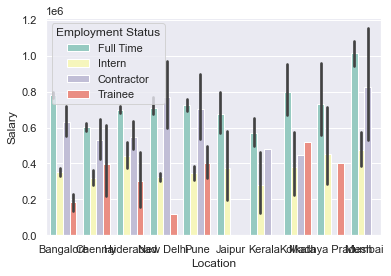

In [21]:
# change of salary in different locations # 1st plot
sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.barplot(data=salary, x= 'Location', y= 'Salary', hue='Employment Status', palette= "Set3")
plt.show()

### Line plot

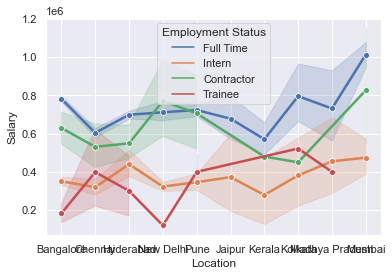

In [22]:
# 2nd plot
sns.lineplot(data=salary, x="Location", y="Salary", hue="Employment Status", linewidth=2.5, marker='o')
plt.show()

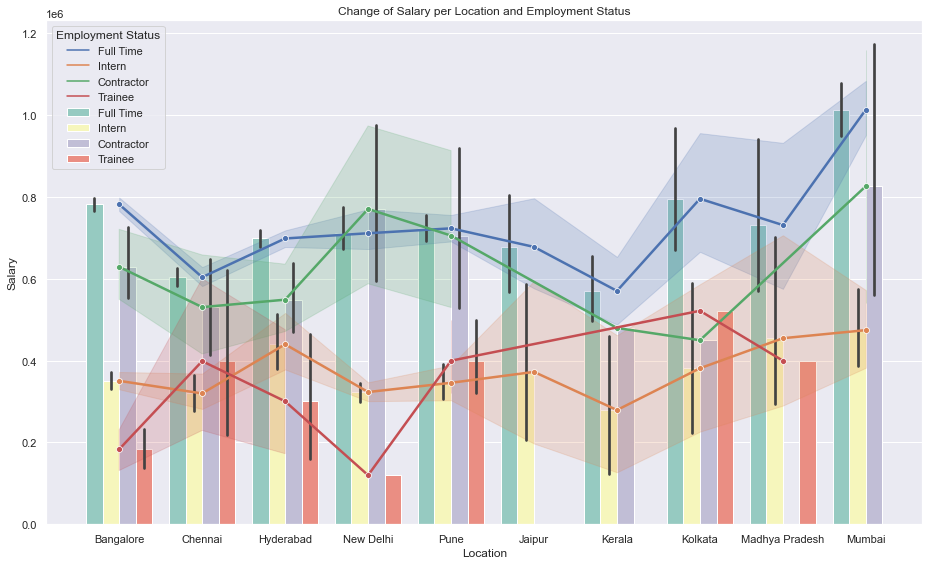

In [23]:
#Combining two plots and adding title
sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.barplot(data=salary, x= 'Location', y= 'Salary', hue='Employment Status', palette= "Set3")
sns.lineplot(data=salary, x="Location", y="Salary", hue="Employment Status", 
    linewidth=2.5, marker='o')
plt.title("Change of Salary per Location and Employment Status")
plt.show()

## Bar plot for company name vs salary

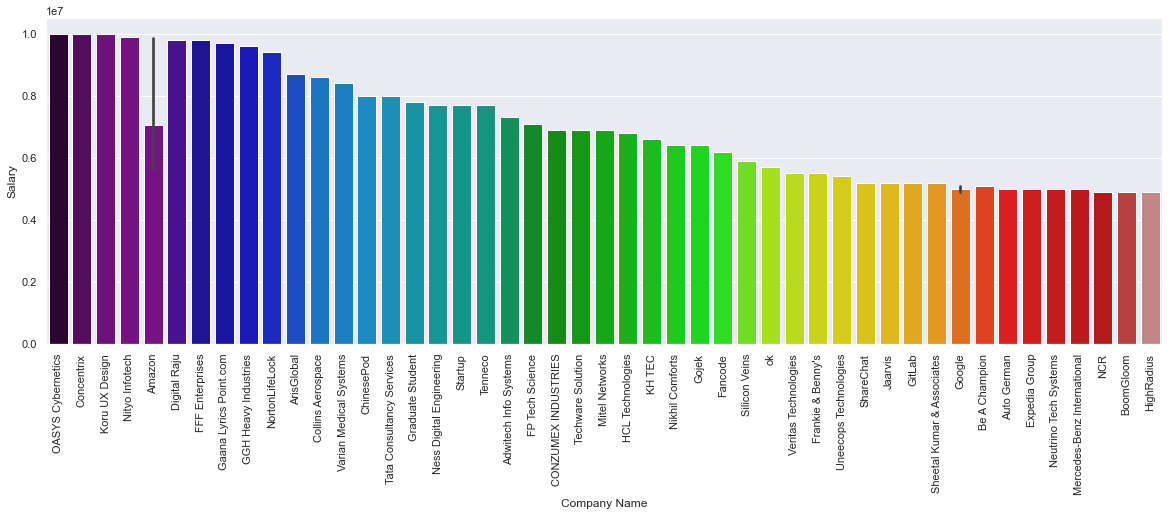

In [24]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation= 90)
salary.sort_values("Salary", axis= 0, ascending= False, inplace= True)
sns.barplot(x= salary['Company Name'][1:51], y= salary['Salary'][1:51], palette = "nipy_spectral")
plt.show()

## Pie chart

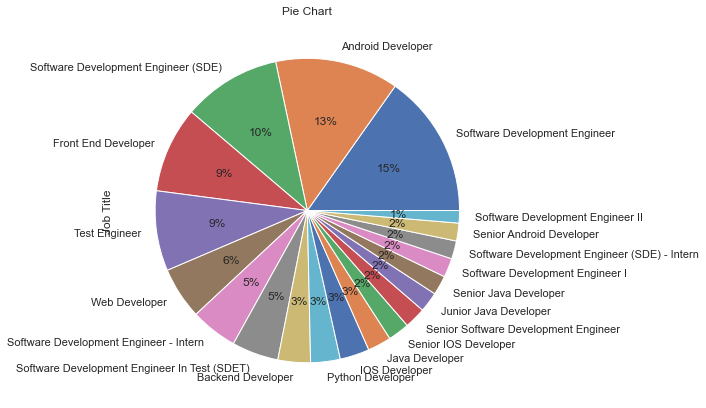

In [26]:
salary["Job Title"].value_counts()[:20].plot.pie(figsize = (7, 7), autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

## Histogram for comapny rating

<AxesSubplot:>

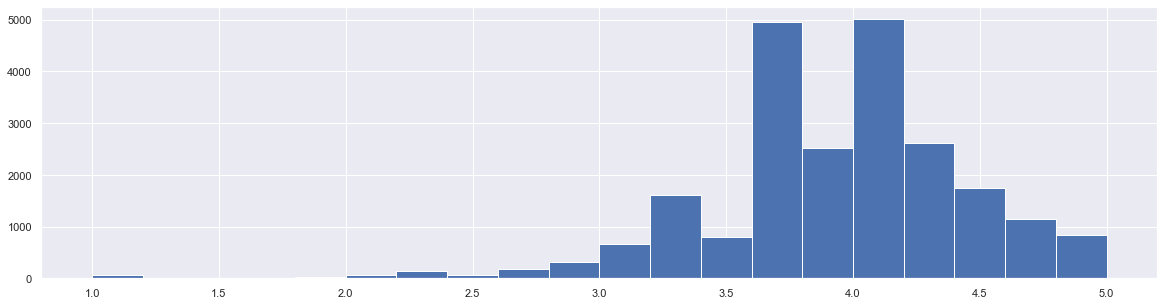

In [28]:
n_bins= 20
plt.figure(figsize = (20, 5))
salary["Rating"].hist(bins = n_bins)

<AxesSubplot:>

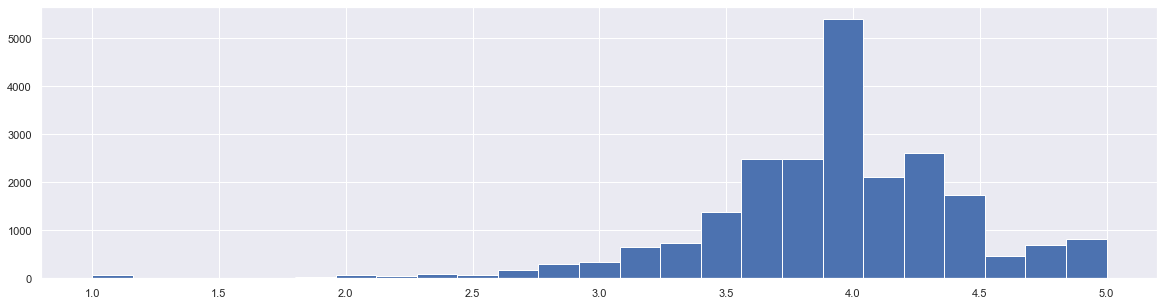

In [29]:
n_bins= 25
plt.figure(figsize = (20, 5))
salary["Rating"].hist(bins = n_bins)

## Scattor plot on company rating vs salaries reported vs location

In [30]:
fig = px.scatter(salary, x = "Rating", y = "Salaries Reported", color = "Location")
fig.show()